# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

### Импорт библиотек

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

Открою датасет и взляну на данные. Узнаю, есть ли пропуски, требуют ли данные каких-либо корректировок. Буду использовать методы `.info()`, `.describe()`, `.head()`, `.columns`, `.isna().sum()`

In [2]:
df = pd.read_csv('real_estate_data.csv', sep='\t')
display(df.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Этот же код скорректировал, добавив аргумент `sep='\t'` после первичного вывода `.head(10)` 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Столбцы `ceiling_height`, `floors_total`, `living_area`, `kitchen_area`, `locality_name`, `cityCenters_nearest`, `days_exposition` необходимы для проведения исследования, поэтому с пропусками в них буду работать. Остальные столбцы пока трогать не буду.

In [5]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [6]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

### Вывод

Что вижу после вывода всех вышеуказанных методов: 
1. Огромное количество пропусков в большом количестве столбцов. Метод `isna()` только подтвердил это. Причем пропуски в данных столбцов разного типа данных.
2. Мне не нравится тип данные столбца `floors_total` (сейчас `.float64`, а дробных этажей, вроде, не бывает). Поменяю тип данных чуть дальше в работе. 
3. Столбец `balcony` отображает наличие балкона. Также требуется целочисленный тип данных. То же самое в  `days_exposition`.
4. В названиях столбцов лишних пробелов нет, но есть пропущенный нижний регистр в столбцах `cityCenters_nearest`, `ponds_around3000`, `parks_around3000`. Это, наверно, не критично, но я приведу к одному формату с нижним регистром и строчными буквами. 
5. Также это первый проект, в котором в датасете появился булев тип данных (не в теории). 

## Предобработка данных

В рамках предобработки данных выполню следующие шаги: 
1. Немного поправлю названия столбцов датафрейма.
2. Заполню пропуски в необходимых для дальнейшего анализа столбцах (высота потолков, кол-во этажей в зданиях, жилая площадь, площадь кухни, отдаленность от центра, кол-во балконов и длительность размещения объявлений). 
3. Поменяют тип данных на целочисленный в столбцах с целочисленными значениями и теми, где не могут быть дробные значения (например: кол-во комнат). 
4. Проверю датафрейм на наличие дубликатов. Если будут, избавлюсь от них. 

### Корректировка названий столбцов ###
Начнем с того, что приведу к единому формату заголовки столбцов. 

In [7]:
df = df.rename(columns = {'cityCenters_nearest' : 'city_centers_nearest', 'ponds_around3000': 'ponds_around_3000', 'parks_around3000' : 'parks_around_3000'})

### Заполнение пропусков ###
Займемся пропусками. Я постараюсь не заменять данные во всех столбцах, так как руководствуюсь тем, что нет смысла делать замены в тех столбцах, которые не используются для анализа. 

Первый столбец, в котором видны пропуски - `ceiling_height`, отражающий высоту потолков. Это очень важный параметр в данных, поскольку он влияет как на скорость продажи/аренды квартиры, так и на саму стоимость продажи/аренды. Думаю, что где-то получить данные для восстановления их в датафрейме уже врядли получится, поэтому попробую заполнить пропуски в этом столбце расчетным методом, поскольку их аж 39%. 

Из данных, ранее полученных при вызове метода `.describe()` видно, что разброс данные очень велик в данном столбце. Просто средним значением или медианной заполнять будет некорректно. Я сгруппирую данные по названию населенного пункта и расчитаю медианное значение для каждого из них.

In [8]:
df.pivot_table(index='locality_name', values='ceiling_height', aggfunc='median')

,ceiling_height
locality_name,
Бокситогорск,3.90
Волосово,2.50
Волхов,2.58
Всеволожск,2.70
Выборг,2.55
...,...
садовое товарищество Рахья,2.60
село Копорье,2.50
село Павлово,2.75


Видим, что в самой колонке `locality_name` есть 49 пропусков. Это всего 0,2% от общего количества данных. Пока оставлю эти пропуски, если в дальнейшем будет необходимо, то удалю эти строки.

In [9]:
df['ceiling_height'] = df['ceiling_height'].fillna(df.groupby('locality_name')['ceiling_height'].transform('median'))
df['ceiling_height'].isna().sum()

156

Снизили кол-во пропусков в столбце до 156. 

In [10]:
df[df['ceiling_height'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
110,6,3850000.0,72.30,2017-09-29T00:00:00,2,NaN,3.0,27.4,2,NaN,...,23.6,0.0,деревня Пикколово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
168,9,2250000.0,73.00,2018-11-14T00:00:00,3,NaN,5.0,43.4,5,NaN,...,8.4,NaN,деревня Заклинье,NaN,NaN,NaN,NaN,NaN,NaN,46.0
986,10,1950000.0,62.00,2015-02-19T00:00:00,3,NaN,5.0,NaN,5,NaN,...,NaN,NaN,поселок Севастьяново,NaN,NaN,NaN,NaN,NaN,NaN,1069.0
1451,10,1150000.0,33.00,2016-11-28T00:00:00,1,NaN,3.0,NaN,3,False,...,NaN,2.0,деревня Иссад,NaN,NaN,NaN,NaN,NaN,NaN,245.0
1625,7,1980000.0,23.98,2018-02-01T00:00:00,0,NaN,4.0,10.5,3,NaN,...,NaN,1.0,поселок станции Корнево,NaN,NaN,NaN,NaN,NaN,NaN,120.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22935,8,799000.0,47.20,2018-06-16T00:00:00,2,NaN,5.0,30.6,3,NaN,...,6.3,1.0,поселок Володарское,NaN,NaN,NaN,NaN,NaN,NaN,5.0
23048,7,2449000.0,53.60,2018-07-10T00:00:00,2,NaN,5.0,28.4,2,NaN,...,8.8,NaN,коттеджный посёлок Лесное,NaN,NaN,NaN,NaN,NaN,NaN,161.0
23214,3,7990000.0,56.00,2016-05-31T00:00:00,2,NaN,6.0,NaN,5,False,...,NaN,0.0,NaN,11206.0,8943.0,0.0,NaN,0.0,NaN,70.0
23354,18,900000.0,42.60,2018-02-26T00:00:00,2,NaN,2.0,28.0,1,NaN,...,9.0,NaN,деревня Тихковицы,NaN,NaN,NaN,NaN,NaN,NaN,219.0


Из имеющигося датасета я не смогу воссоздать или восстановить недостающие данные по оставшимся 156 пропускам, поэтому я избавлюсь от этих строк. Влияние на конечный результат будет незначительным, поскольку это всего лишь 0,65% данных. К тому же в этих строках далеко не везде указаны другие данные (площадь, расстояние до центра и т.д.), необходимые для проведения анализа. 

In [11]:
df = df.dropna(subset =['ceiling_height'])
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               84
living_area              1874
floor                       0
is_apartment            20789
studio                      0
open_plan                   0
kitchen_area             2241
balcony                 11453
locality_name              14
airports_nearest         5420
city_centers_nearest     5397
parks_around_3000        5396
parks_nearest           15472
ponds_around_3000        5396
ponds_nearest           14450
days_exposition          3154
dtype: int64

Со столбцом с высотой потолков закончили. Далее перейдем к этажности дома. Пропусков всего 84.

In [12]:
floors_total_isna = df[df['floors_total'].isna()]
floors_total_isna

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
186,12,11640000.0,65.2,2018-10-02T00:00:00,2,2.7,NaN,30.80,4,NaN,...,12.00,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033.0,28.1,2016-11-23T00:00:00,1,2.7,NaN,20.75,1,NaN,...,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348.0,70.8,2015-08-01T00:00:00,2,2.7,NaN,38.40,12,NaN,...,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191.0,93.6,2017-04-06T00:00:00,3,2.7,NaN,47.10,8,NaN,...,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000.0,39.0,2017-04-22T00:00:00,1,2.7,NaN,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,5,8500000.0,63.5,2017-05-24T00:00:00,2,2.8,NaN,NaN,3,NaN,...,NaN,NaN,Санкт-Петербург,51340.0,15363.0,0.0,NaN,1.0,853.0,512.0
22656,4,4574160.0,64.5,2017-04-02T00:00:00,2,2.7,NaN,31.70,20,NaN,...,14.40,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,127.0
22808,0,14569263.0,110.4,2016-11-20T00:00:00,3,2.7,NaN,45.38,6,NaN,...,23.42,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,260.0
23590,0,21187872.0,123.3,2017-04-25T00:00:00,3,2.7,NaN,50.40,18,NaN,...,23.60,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,104.0


Этажность здания восстановить проблематично. На текущий момент поступлю следующим образом: за основу возьму этаж, на котором размещено объявление и добавлю к нему `1`, чтобы сильно не искажать данные для дальнейшего анализа. 

In [13]:
df['floors_total'] = df['floors_total'].fillna(df['floor'] + 1).astype('int')
df['floors_total'].isna().sum()

0

Теперь перейду к заполнению пропусков в столбце `living_area`. Сгруппирую датафрейм по количеству комнат, рассчитаю медиану и заполню пропуски в столбце `living_area`. 

In [14]:
df['living_area'] = df['living_area'].fillna(df.groupby('rooms')['living_area'].transform('median'))
df['living_area'].isna().sum()

0

`is_apartment` трогать не буду, этот столбец не нужен для нашего исследования. `kitchen_area` заполняем похожим образом. Но в данном случае я заполню значением среднего арифметического. Логика следующая: если мы имеем одинаковую общую площадь всей квартиры, то соседняя квартира, в значение которой есть пропуск в столбце `kitchen_area`, идентична с точки зрения планировки, а значит площадь кухни одинаковая. 

In [15]:
df['kitchen_area'] = df['kitchen_area'].fillna(df.groupby('total_area')['kitchen_area'].transform('mean'))
df['kitchen_area'].isna().sum()

203

У нас осталось 203 пропуска в данном столбце, из-за того, что этих значений по одному. Медианну и среднее арифметическое считать не из чего. Поступим следующим образом: заполни их просто медианным значением по столбцу всего датафрейму. 

In [16]:
kitchen_area_median = df['kitchen_area'].median()
df['kitchen_area'] = df['kitchen_area'].fillna(kitchen_area_median)
df['kitchen_area'].isna().sum()

0

Заменим пропуски в столбце `balcony` на `0`, руководствуясь той логикой, что данные в этом столбце не указаны из-за того, что балкон в этой квартире отсутствует. 

In [17]:
df['balcony'] = df['balcony'].fillna(value='0')
df['balcony'].isna().sum()

0

Пропусков в столбце `locality_name` всего 14. Ими, предположу, можно пренебречь, поэтому просто удалю эти данные. 

In [18]:
df = df.dropna(subset=['locality_name'])

Я сохранил в отдельную переменную данные с пропусками по столбцу `city_centers_nearest`. Видно, что это отдельные населенные пункты. Восстановить их удаленность от центра представляется проблематичным, но и удалять большое кол-во строк не буду. Заменю на 0, так как далее мне понадобится этот столбец для анализа. 

In [19]:
df['city_centers_nearest'] = df['city_centers_nearest'].fillna('0')
df['city_centers_nearest'] = df['city_centers_nearest'].astype('int')
df['city_centers_nearest'].isna().sum()

0

Чтобы заполнить пропуски в столбце с длительностью  объявления на сайте, я расчитаю среднее арифметическое значение данного столбца по населенным пунктам и заполню этим значением пропуски с привязкой к населенному пункту. Думаю, что среднее арифметическое в данном случае будет уместно использовать, так как выбросов в данных по этому столбцу не должно быть. 

In [20]:
df[df['days_exposition'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16,51.0,8,NaN,...,25.000000,0,Санкт-Петербург,18863.0,16028,1.0,482.0,2.0,755.0,NaN
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.70,24,30.5,22,NaN,...,18.900000,2.0,Санкт-Петербург,23982.0,11634,0.0,NaN,0.0,NaN,NaN
44,13,5350000.0,40.00,2018-11-18T00:00:00,1,2.70,22,17.6,3,NaN,...,10.051821,1.0,Санкт-Петербург,30471.0,11603,1.0,620.0,1.0,1152.0,NaN
45,17,5200000.0,50.60,2018-12-02T00:00:00,2,2.65,9,30.3,7,NaN,...,7.000000,0,Санкт-Петербург,30011.0,12872,0.0,NaN,0.0,NaN,NaN
46,17,6600000.0,52.10,2019-01-31T00:00:00,2,2.60,24,29.7,9,NaN,...,8.300000,2.0,Санкт-Петербург,15114.0,12702,0.0,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23683,16,2100000.0,62.80,2018-09-18T00:00:00,4,2.50,5,45.5,3,NaN,...,5.500000,0,посёлок Дзержинского,NaN,0,NaN,NaN,NaN,NaN,NaN
23684,20,21400000.0,145.00,2018-11-02T00:00:00,4,3.00,26,71.4,17,NaN,...,15.600000,0,Санкт-Петербург,11827.0,11459,0.0,NaN,0.0,NaN,NaN
23685,15,2490000.0,31.00,2019-01-24T00:00:00,1,2.50,5,17.3,5,NaN,...,5.600000,1.0,Ломоносов,48393.0,51818,0.0,NaN,0.0,NaN,NaN
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5,73.3,3,NaN,...,13.830000,0,Санкт-Петербург,24665.0,4232,1.0,796.0,3.0,381.0,NaN


Совсем небольшое кол-во оставшихся пустыми строк столбца я заполню `0`, так как буду считать, что эти квартиры еще не проданы. 

In [21]:
df['days_exposition'] = df['days_exposition'].fillna(df.groupby('locality_name')['days_exposition'].transform('mean'))
df['days_exposition'] = df['days_exposition'].fillna(0)
df['days_exposition'].isna().sum()

0

### Замена типов данных ###

Заменю тип данных в колонках `floors_total`, `balcony`, `parks_around_3000`, `ponds_around_3000`, `days_exposition` на `int`. Попробую чуть-чуть автоматизировать это - напишу соответствующую функцию и применю ее. 

def change_type(value):
    result = value.astype('int')
    return result

df['rooms'] = change_type(df['rooms'])
df['floors_total'] = change_type(df['floors_total'])
df['days_exposition'] = change_type(df['days_exposition'])
df['balcony'] = change_type(df['balcony'])
df['last_price'] = df['last_price'].astype('int32')
df['city_centers_nearest'] = change_type(df['city_centers_nearest'])
df.info()

### Проверка на дубликаты

Хоть этого и нет в ТЗ проекта, но я посмотрю, есть ли дубликаты в данных. 

In [22]:
df.duplicated().sum()

0

Явные дубликаты отсутствуют. 

### Вывод

Отлично. На этом с предобработкой данных закончу. Пришлось уделить достаточно большое количество времени для приведения данных в рабочее состояние. Одной из причин этому является очень большое кол-во пропусков в датафрейме сразу в нескольких столбцах. Предположу, что пропуски имеют место быть по нескольким причинам: 
- во-первых, многие данные (такие, как высота потолков) могут быть просто не указаны в объявлении. По собственному опыту, высота потолков интересует далеко не в первую очередь при выборе квартиры. 
- во-вторых, могла просто возникнуть техническая ошибка. И в первом и во втором случае, я бы срочно обратился к тем, кто предоставил данные, поскольку по нескольким столбцам, очень необходимым для анализа, отсутствует около 25% данных. 
- в-третьих, пропуски в некоторых столбцах могут быть связаны с тем, что этих данных просто не может быть. Например, столбец с кол-вом балконов, в котором около половины пропусков. Это означает, что в этих квартирах просто нет балконов. Или столбец с удаленностью от центра: отсутствие значения говорит о том, что населенный пункт просто не в городе, и считать удаленность от центра по таким объектам, наверно, некорректно. 

В предобработке данных пришлось также менять формат многих столбцов для того, чтобы в дальнейшем с ними можно было проводить рассчетные операции. Это, собственно, основная причина переформатирования столбцов. 

Теперь перейдем к следующему этапу проекта. 

## Расчёты и добавление результатов в таблицу

В этой части работы проведу следующие операции: 
1. Рассчитаю стоимость квадратного метра и сохраню это в отдельный столбец в датафрейме, так как эти значения понадобятся мне дальше в рассчетах. 
2. Отформатирую столбец с датой продажи.
3. Отдельно добавлю столбцы с днем, неделей и месяцем размещения объявления. 
4. Заполню пропуски в столбце с этажностью домов. 
5. Посчитаю долю жилой площади и кухни в объявлениях квартир. 

### Расчет стоимости квадратного метра
Добавим цену квадратного метра в датафрейм, рассчитав по простой формуле: общая стоимость недвижимости / общую площадь. 

In [23]:
df['square_meter_price'] = df['last_price'] / df['total_area']
df['square_meter_price'] = df['square_meter_price'].astype('int')
df.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,square_meter_price
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16,51.0,8,NaN,...,0,Санкт-Петербург,18863.0,16028,1.0,482.0,2.0,755.0,182.792198,120370
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.63,11,18.6,1,NaN,...,2.0,посёлок Шушары,12817.0,18603,0.0,NaN,0.0,NaN,81.000000,82920
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.70,5,34.3,4,NaN,...,0.0,Санкт-Петербург,21741.0,13933,1.0,90.0,2.0,574.0,558.000000,92785
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.70,14,45.0,9,NaN,...,0.0,Санкт-Петербург,28098.0,6800,2.0,84.0,3.0,234.0,424.000000,408176
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14,32.0,13,NaN,...,0,Санкт-Петербург,31856.0,8098,2.0,112.0,1.0,48.0,121.000000,100000


### Дата продажи. Форматирование
Далее поработаем с столбцом даты продажи. Приведем столбец к нужному формату. Вызваз метод `.unique()`, мы видим, что время во всех данных - `00:00:00`, поэтому при переформатировании у нас в столбце остается только дата размещения. 

In [24]:
df['first_day_exposition'].unique()
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
df.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,square_meter_price
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,NaN,...,0,Санкт-Петербург,18863.0,16028,1.0,482.0,2.0,755.0,182.792198,120370
1,7,3350000.0,40.4,2018-12-04,1,2.63,11,18.6,1,NaN,...,2.0,посёлок Шушары,12817.0,18603,0.0,NaN,0.0,NaN,81.000000,82920
2,10,5196000.0,56.0,2015-08-20,2,2.70,5,34.3,4,NaN,...,0.0,Санкт-Петербург,21741.0,13933,1.0,90.0,2.0,574.0,558.000000,92785
3,0,64900000.0,159.0,2015-07-24,3,2.70,14,45.0,9,NaN,...,0.0,Санкт-Петербург,28098.0,6800,2.0,84.0,3.0,234.0,424.000000,408176
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,NaN,...,0,Санкт-Петербург,31856.0,8098,2.0,112.0,1.0,48.0,121.000000,100000


### Добавление столбцов с днем, неделей и месяцем ###

Добавим дополнительно 3 столбца в датафрейм, так как они понадобятся нам в дальнейшем исследовании. 

In [25]:
df['weekday'] = pd.DatetimeIndex(df['first_day_exposition']).weekday
df['month'] = pd.DatetimeIndex(df['first_day_exposition']).month
df['year'] = pd.DatetimeIndex(df['first_day_exposition']).year
df.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,square_meter_price,weekday,month,year
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,NaN,...,16028,1.0,482.0,2.0,755.0,182.792198,120370,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,2.63,11,18.6,1,NaN,...,18603,0.0,NaN,0.0,NaN,81.000000,82920,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,2.70,5,34.3,4,NaN,...,13933,1.0,90.0,2.0,574.0,558.000000,92785,3,8,2015
3,0,64900000.0,159.0,2015-07-24,3,2.70,14,45.0,9,NaN,...,6800,2.0,84.0,3.0,234.0,424.000000,408176,4,7,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,NaN,...,8098,2.0,112.0,1.0,48.0,121.000000,100000,1,6,2018


### Этажность квартиры 
Перейдем к этажности квартиры. Для того, чтобы опредилить, на каком этаже находится квартира, я напишу функцию, которая будет определять это по трем условиям: если этаж == 1, тогда возвращай "первый этаж", если этаж == "floors_total", возвращай последний этаж, во всех остальных случаях - другой. Создадим для этого также новую колонку под названием `appartment_floor` 

In [26]:
def appartment_floor(row):
    if row['floor'] == 1:
        return "первый этаж"
    elif row['floor']== row['floors_total']:
        return 'последний этаж'
    else: 
        return 'другой'

df['appartment_floor'] = df.apply(appartment_floor, axis=1)
df['appartment_floor'].unique()

array(['другой', 'первый этаж', 'последний этаж'], dtype=object)

### Расчет долей

Для расчета соотношения жилой площади, а также площади кухни к общей площади квартиры необходимо также создать 2 соответствующих столбца в датафрейме и просто посчитать это соотношение. И отформитируем значения. 

In [27]:
df['living_area_share'] = df['living_area'] / df['total_area'] * 100 
df['kitchen_share'] = df['kitchen_area'] / df['total_area'] * 100

In [28]:
df['kitchen_share'] = pd.Series(["{0:.2f}%".format(val) for val in df['kitchen_share']], index = df.index)
df['living_area_share'] = pd.Series(["{0:.2f}%".format(val) for val in df['living_area_share']], index = df.index)
df.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around_3000,ponds_nearest,days_exposition,square_meter_price,weekday,month,year,appartment_floor,living_area_share,kitchen_share
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,NaN,...,2.0,755.0,182.792198,120370,3,3,2019,другой,47.22%,23.15%
1,7,3350000.0,40.4,2018-12-04,1,2.63,11,18.6,1,NaN,...,0.0,NaN,81.000000,82920,1,12,2018,первый этаж,46.04%,27.23%
2,10,5196000.0,56.0,2015-08-20,2,2.70,5,34.3,4,NaN,...,2.0,574.0,558.000000,92785,3,8,2015,другой,61.25%,14.82%
3,0,64900000.0,159.0,2015-07-24,3,2.70,14,45.0,9,NaN,...,3.0,234.0,424.000000,408176,4,7,2015,другой,28.30%,10.13%
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,NaN,...,1.0,48.0,121.000000,100000,1,6,2018,другой,32.00%,41.00%


### Добавление столбца с дистанцией от центра в км

In [29]:
df['center_distance_km'] = df['city_centers_nearest'] / 1000 

### Вывод

Итак, мы привели данные в рабочее состояние, а также добавили необходимые столбцы для непосредственного анализа данных. 
Я бы, наверно, для более качественного анализа еще попросил выгрузить данные по оставшейся площади квартиры, поскольку общая площадь != `living_area`+`kitchen_area`. Не хватает данных по корридорам и прочему квартирному пространству. 

## Исследовательский анализ данных

Начнем изучение данных с потроения гистограмм по основным показателям: 
- площадь
- цена
- число комнат 
- высота потолков 
- время продажи квартиры

### Площадь ###

52.0

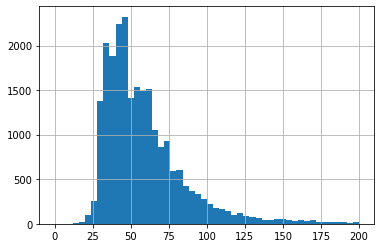

In [30]:
df['total_area'].hist(bins=50, range=(0, 200))
df['total_area'].median()

Чтобы мне было удобнее построить диаграмму размаха по столбцу общей площади, я сохраню эти данные в отдельную переменную, по которой и буду строить диаграмму. Сама переменная далее не понадобится. **Все срезы буду делать в основном датафрейме, который называется `df`.** 

,total_area
count,23529.000000
mean,60.388915
std,35.729817
min,12.000000
25%,40.000000
50%,52.000000
75%,70.000000
max,900.000000


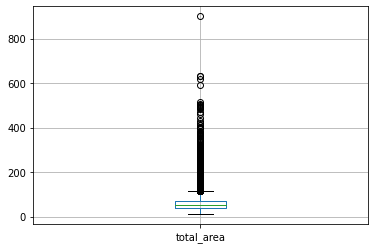

In [31]:
total_area = df.loc[:, ['first_day_exposition','total_area']]
total_area.boxplot()
total_area.describe()

In [32]:
total_area.query('total_area > 170').count()

first_day_exposition    368
total_area              368
dtype: int64

**Комментарий к гистограмме и диаграмме по общей площаде**

Из гистограммы видны несколько пиковых значеий около `50`. При этом распределение не выглядит равномерным, много значений свыше 100 квадратных метров. Есть значения около 300, но их немного. 

На графике 2 явных пика: ~40-45, ~60-70. 

На диаграмме размаха отчетливее видно, что "нижний ус" упирается в миниальное значение - 12 кв. метров, тогда как межквартильных размах лежит в диапозоне от 40 до 69,7 кв. метров. Это говорит о том, что границей между нормальными значениями и аномальными является (расчетно): (69,7 - 40)* 1,5 = ~ 115 кв. метров. 

В этом пункте я все же отдам приоритет гистограмме, так как на ней видно, что после значений в 115 кв метров есть достаточно большое кол-во значений, которые я не хочу терять. Поэтому, я приму решение удалить из датафрейма значения свыше 170 по столбцу общей площади квартиры. Хвост гистограммы не будет очень длинным, но при этом мы сможем сохранить большое кол-во данных для дальнейшего исследования. 

Этой же логикой я буду пользоваться дальше при анализе других столбцов. 

### Цена ###

Для удобства я создам столбец в датафрейме с ценой, указанной в миллионах рублей. 

In [33]:
df['last_price_mln'] = df['last_price'] / 1000000

<AxesSubplot:>

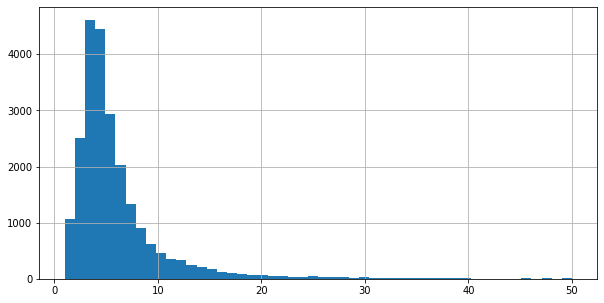

In [34]:
df['last_price_mln'].hist(bins=50, range=(1, 50), figsize=(10,5))

       last_price_mln
count    23529.000000
mean         6.565835
std         10.918723
min          0.012190
25%          3.450000
50%          4.650000
75%          6.800000
max        763.000000
AxesSubplot(0.125,0.125;0.775x0.755)


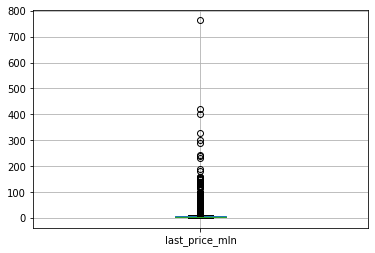

In [35]:
last_price = df.loc[:, ['last_price_mln', 'first_day_exposition']]
print(last_price.describe())
print(last_price.boxplot())

In [36]:
last_price.query('last_price_mln > 30').count()

last_price_mln          316
first_day_exposition    316
dtype: int64

***Комментарий по гистограмме по цене недвижимости***

Что видим: 
- boxplot, если честно, не сильно информативен в данном случае. Опять же, ориентируясь на логику, описанную в изучении данных по площади, скажу, что из гистограммы видно, что значений свыше 30 млн рублей очень мало. 
- При этом межквартильный размах - 3,35 млн рублей, а верхняя граница между нормальными и аномальными значениями - 10,14 млн рублей. Но я не хочу терять данные о квартирах стоимостью от 10 до 30 млн рублей, так как у меня есть подозрение, что это именно те квартиры, которые находятся в центре города. А по ним нужно делать дальше отдельный анализ. Я их оставлю, а удалю данные столбцу цены, значения которых свыше 30 млн. рублей. 

### Кол-во комнат ###

count    23529.000000
mean         2.070976
std          1.079811
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

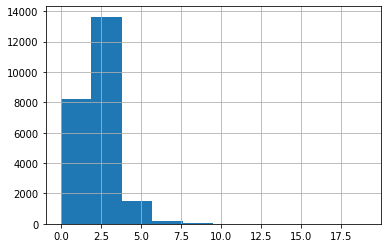

In [37]:
df['rooms'].hist(bins=10)
df['rooms'].describe()

<AxesSubplot:>

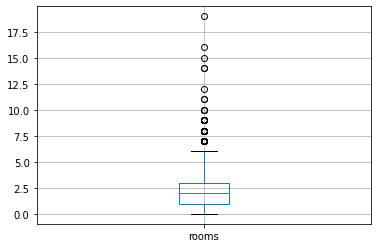

In [38]:
rooms = df.loc[: , ['rooms', 'first_day_exposition']]
rooms.boxplot()

**Комментарий по гистограмме и диаграмме по кол-ву комнат**

Достаточно прозрачно со столбцом по кол-ву комнат. Все, что выше значения 7 - то аномалии.  
 

count    23529.000000
mean         2.733949
std          1.012964
min          1.000000
25%          2.550000
50%          2.700000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

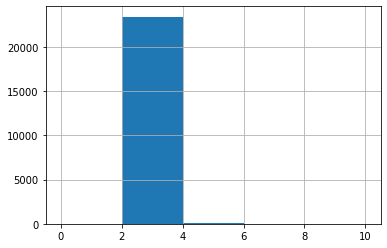

In [39]:
df['ceiling_height'].hist(bins=5, range=(0, 10))
df['ceiling_height'].describe()

### Высота потолков ###

<AxesSubplot:>

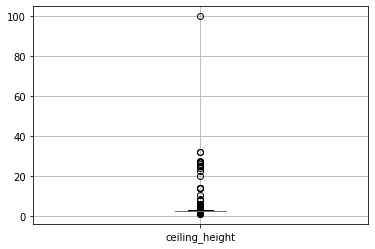

In [40]:
ceiling_height = df.loc[:, ['ceiling_height' , 'first_day_exposition']]
ceiling_height.boxplot()

**Комментрий к гистограмме  по высоте потолков**

Очень маленький межквартильных размах. Данные распределены очень равномерно. При этом на гистограмме видно, что значений свыше 4 очень мало. 

На диаграмме размаха видно, что все-таки много значений выше "верхнего уса". Предположу, что это данные, указанные не в метрах, а в сантиметрах. 
Посмотрю на эти данные. 

In [41]:
over_4_meters =  df[df['ceiling_height']  > 4]
over_4_meters.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,airports_nearest,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,square_meter_price,weekday,month,year,center_distance_km,last_price_mln
count,79.000000,7.900000e+01,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,58.000000,...,37.000000,61.000000,38.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,11.088608,2.053124e+07,109.906329,2.658228,12.775316,7.000000,64.697089,4.860759,14.678317,26561.586207,...,469.189189,1.213115,478.078947,248.899612,146089.025316,2.518987,6.784810,2017.227848,6.390722,20.531241
std,6.522525,3.212502e+07,108.991403,1.559800,13.917414,5.890018,64.976727,4.422362,10.993968,9658.381536,...,259.792742,1.170680,242.209914,258.241654,128177.749647,1.678375,3.582976,1.120318,8.088266,32.125020
min,0.000000,5.500000e+05,25.000000,0.000000,4.060000,2.000000,14.000000,1.000000,5.200000,11647.000000,...,110.000000,0.000000,30.000000,6.000000,18965.000000,0.000000,1.000000,2014.000000,0.000000,0.550000
25%,6.000000,3.900000e+06,45.000000,2.000000,4.335000,4.000000,29.500000,2.000000,8.040267,21801.750000,...,295.000000,0.000000,288.500000,60.500000,76162.000000,1.000000,3.000000,2017.000000,0.826500,3.900000
50%,13.000000,8.150000e+06,69.000000,2.000000,5.200000,5.000000,44.200000,3.000000,10.000000,24659.000000,...,473.000000,1.000000,526.000000,182.792198,108695.000000,3.000000,7.000000,2017.000000,4.291000,8.150000
75%,17.000000,1.575000e+07,112.750000,3.000000,25.000000,7.000000,66.500000,5.000000,16.250000,27047.500000,...,584.000000,2.000000,616.750000,350.500000,158571.000000,4.000000,10.000000,2018.000000,8.336000,15.750000
max,20.000000,1.550000e+08,507.000000,7.000000,100.000000,36.000000,347.500000,26.000000,63.000000,68923.000000,...,1248.000000,3.000000,866.000000,1078.000000,634328.000000,6.000000,12.000000,2019.000000,50.649000,155.000000


Их немного. И, как видно из таблицы, максимальное значение равно 100, что говорит о том, что эти данные указаны все-таки в метрах. Поступлю следующим образом: отсечкой будет значение в 7 метров, исходя из того предположения, что это 2-х уровневые апартаменты с очень высокими потолками. 

### Анализ времени продажи квартиры

,days_exposition
count,23529.000000
mean,180.667396
std,205.443003
min,0.000000
25%,45.000000
50%,120.000000
75%,209.000000
max,1580.000000


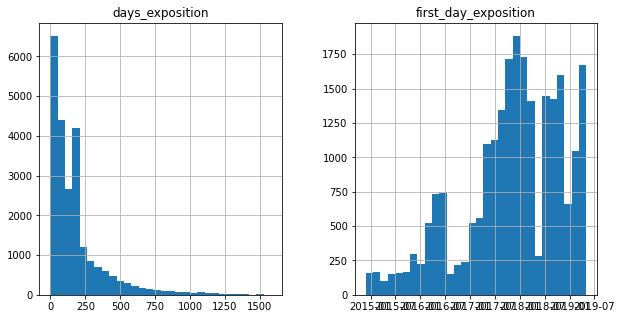

In [42]:
days_exposition = df.loc[: , ['days_exposition', 'first_day_exposition']]
days_exposition.hist(bins=30, figsize=(10,5))
days_exposition.describe()

<AxesSubplot:>

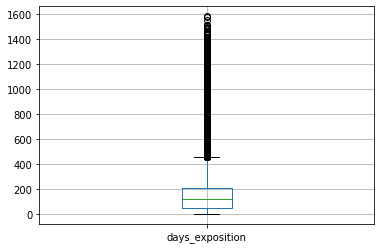

In [43]:
days_exposition.boxplot()

Что видим: 
- Очень длинный хвост на гистограмме после значения 400, хотя сильный излом на значении 200. Межквартильный размах равен 164, что говорит о том, что границей между нормальными и аномальными значениями является значение в 450 дней. 
- При этом видим пик у значения "0". Это те квартиры, по которым были пропуски в датафрейме, которые в свою очередь мы заменили на "0" из предположения, что квартиры еще не проданы. Таких значений всего 64. Их я удалю из датафрейма дальше, чтобы не искажать данные. 
- Медианное значение равно 120, тогда как среднее арифметическое - 180. 
- На диаграмме размаха видна очень большая плотность значений после 450. Таких строк около 2000, что очень много для удаления. Велико будет влияние на весь датафрейм и дальнейшее исследование. Я приму решение также удалить значения свыше 800 дней, так как кол-во строк со значениями выше этого очень сильно уменьшается. 

Суммарно потеряю 654 строки. Это много, но необходимо для меньшего искажения исследования. 

Отвечая на вопрос "Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?" можно сказать, что в целом, если квартира продается свыше 450 дней, то она продается очень долго. При этом, если квартира продается меньше 120 дней, то это быстро, меньше 45 - молниеносно. В среднем, продажа квартиры занимает 180 дней. Но, думаю, после удаления аномально больших и нулевых значений, это цифра поменяется. 

Далее уберем редкие и выбивающиеся значения. Сохраню в переменную `good_data` все значения, где по столбцу времени продажи есть превышение значения 1200 и посморю на эти данные. Редкими я буду считать данные, где значение по столбцу `days_exposition` превышает 1200. Их и уберу. Таких значений всего 91 штука, что немного. Можно смело удалять эти данные. Построи заново гистограмму посмотреть, что имеем теперь. 

## Исключение аномалий по ранее проанализированным столбцам датафрейма ###
Сохраню все в переменню `good_data`. Дальше буду работать с ней. 
Условия:

`total_area <= 170`

`last_price_mln <= 30`

`rooms <=7`

`ceiling_height <= 7`

`days_exposition != 0 and days_exposition <=800`

In [44]:
good_data = df.query('total_area <= 170 and last_price_mln <= 30 and rooms <=7 and ceiling_height <= 7 and days_exposition != 0 and days_exposition <= 800')
good_data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,airports_nearest,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,square_meter_price,weekday,month,year,center_distance_km,last_price_mln
count,22364.000000,2.236400e+04,22364.000000,22364.000000,22364.000000,22364.000000,22364.000000,22364.000000,22364.000000,17152.000000,...,7488.000000,17173.000000,8442.000000,22364.000000,22364.000000,22364.000000,22364.000000,22364.000000,22364.000000,22364.000000
mean,9.854185,5.613039e+06,56.756345,2.005679,2.694275,10.785861,32.393450,5.933241,10.138867,28872.073752,...,491.940839,0.744541,524.556503,158.234127,96651.000492,2.569621,6.403371,2017.427562,11.092869,5.613039
std,5.651546,3.758464e+06,23.866578,0.965910,0.209790,6.614656,15.906444,4.906383,4.773148,12771.732022,...,338.212870,0.920757,277.725853,153.892376,35567.015424,1.792039,3.486286,0.979092,9.646430,3.758464
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,...,1.000000,0.000000,13.000000,1.000000,111.000000,0.000000,1.000000,2014.000000,0.000000,0.012190
25%,6.000000,3.400000e+06,40.000000,1.000000,2.550000,5.000000,18.200000,2.000000,7.000000,18420.000000,...,289.000000,0.000000,303.000000,45.000000,76733.000000,1.000000,3.000000,2017.000000,2.447000,3.400000
50%,9.000000,4.599000e+06,51.000000,2.000000,2.700000,9.000000,30.000000,4.000000,9.026770,26939.500000,...,456.000000,0.000000,509.500000,114.000000,94792.500000,3.000000,6.000000,2017.000000,11.550000,4.599000
75%,14.000000,6.500000e+06,67.600000,3.000000,2.700000,16.000000,41.900000,8.000000,11.462500,37434.000000,...,613.000000,1.000000,735.000000,195.000000,113256.750000,4.000000,10.000000,2018.000000,15.395000,6.500000
max,50.000000,3.000000e+07,170.000000,7.000000,5.800000,60.000000,145.000000,33.000000,65.000000,84853.000000,...,3190.000000,3.000000,1344.000000,800.000000,848484.000000,6.000000,12.000000,2019.000000,65.952000,30.000000


Изменения в медианных значениях есть (смещение влево) в столбцах с площадью и временем продажи. В столбцах с кол-вом комнат и высотой потолков изменений практически нет. Это хорошо. 
Сильнее изменения подвержено среднее арифметическое значение. И, соответственно, сместились минимальные и максимальные значения. 

##  Факторы, влияющие на стоимость квартиры. 

Посмотрим, какие факторы влияют на стоимость квартиры. Я создам отдельную переменную для удобства рассчетов. Для начала вызову метод `.corr` и посмострю на взаимосвязи. Потом построю матрицу диаграмм рассеивания. 

In [45]:
analyzing_data = good_data.loc[:, ['last_price', 'last_price_mln','total_area', 'rooms', 'city_centers_nearest', 'center_distance_km']]
analyzing_data.corr()

,last_price,last_price_mln,total_area,rooms,city_centers_nearest,center_distance_km
last_price,1.000000,1.000000,0.778253,0.482243,-0.006840,-0.006840
last_price_mln,1.000000,1.000000,0.778253,0.482243,-0.006840,-0.006840
total_area,0.778253,0.778253,1.000000,0.793307,-0.056963,-0.056963
rooms,0.482243,0.482243,0.793307,1.000000,-0.039190,-0.039190
city_centers_nearest,-0.006840,-0.006840,-0.056963,-0.039190,1.000000,1.000000
center_distance_km,-0.006840,-0.006840,-0.056963,-0.039190,1.000000,1.000000


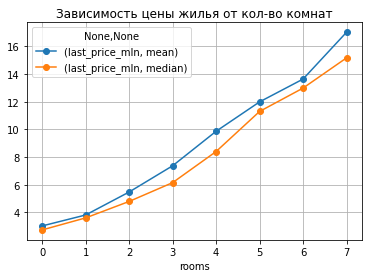

In [46]:
analyzing_data.groupby('rooms').agg({'last_price_mln' : ['mean', 'median']}).plot(style='o-', title='Зависимость цены жилья от кол-во комнат', grid=True)
plt.show()

Чем больше комнат, тем дороже квартира (ожидаемо).

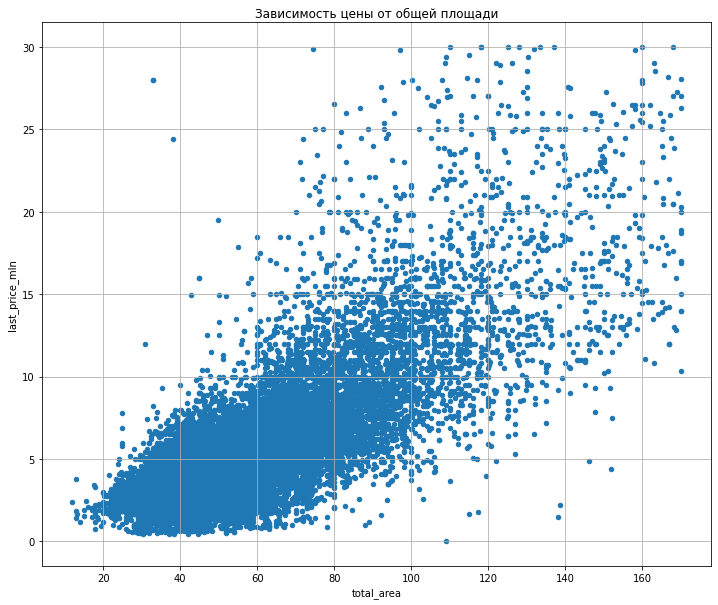

In [47]:
analyzing_data.plot(title='Зависимость цены от общей площади', kind='scatter', x='total_area', y='last_price_mln', grid=True, figsize=(12,10))
plt.show()

Достаточно отчетливо видна зависимость цены от общей площади. Стоимость квартиры увеличивается с ростом ее квадратуры. 

Чтобы построить хорошо читаемый график с понятным визуальным трендом, я немножко сгруппирую данные по расстоянию. Напишу для этого функцию и уже по сгруппированному столбцу сделаю линейный график, отражающий зависимость стоимости жилья от расстояния от центра города. 

In [48]:
def distance(row): 
    if row < 10:
        return 'до 10 км'
    elif row >= 10 and row <15 :
        return 'до 15 км'
    elif row >= 15 and row < 20:
        return 'до 20 км'
    elif row >= 20 and row <30: 
        return 'до 30 км '
    elif row >= 30 and row < 40: 
        return 'до 40 км'
    elif row >= 40 and row < 50:
        return 'до 50 км'
    elif row >= 50: 
        return 'свыше 50 км'

In [49]:
analyzing_data['distance_grouped'] = analyzing_data['center_distance_km'].apply(distance)
analyzing_data.head(10)

,last_price,last_price_mln,total_area,rooms,city_centers_nearest,center_distance_km,distance_grouped
0,13000000.0,13.000,108.00,3,16028,16.028,до 20 км
1,3350000.0,3.350,40.40,1,18603,18.603,до 20 км
2,5196000.0,5.196,56.00,2,13933,13.933,до 15 км
4,10000000.0,10.000,100.00,2,8098,8.098,до 10 км
5,2890000.0,2.890,30.40,1,0,0.000,до 10 км
6,3700000.0,3.700,37.30,1,19143,19.143,до 20 км
7,7915000.0,7.915,71.60,2,11634,11.634,до 15 км
8,2900000.0,2.900,33.16,1,0,0.000,до 10 км
9,5400000.0,5.400,61.00,3,15008,15.008,до 20 км
10,5050000.0,5.050,39.60,1,13878,13.878,до 15 км


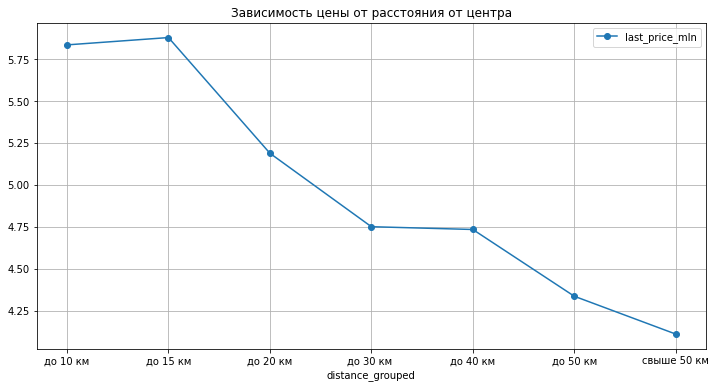

In [50]:
analyzing_data.pivot_table(index='distance_grouped', values='last_price_mln', aggfunc='mean').plot(style='o-', grid=True, figsize=(12,6), title='Зависимость цены от расстояния от центра')
plt.show()

Как видно на графике, чем дальше от центра города, тем дешевле стоимость жилья, что вполне ожидаемо также. 

Построю также график зависимости стоимости квадратного метра квартиры от этажа, на котором она расположена. Сохраню в новую переменную свод, после визуализирую. 

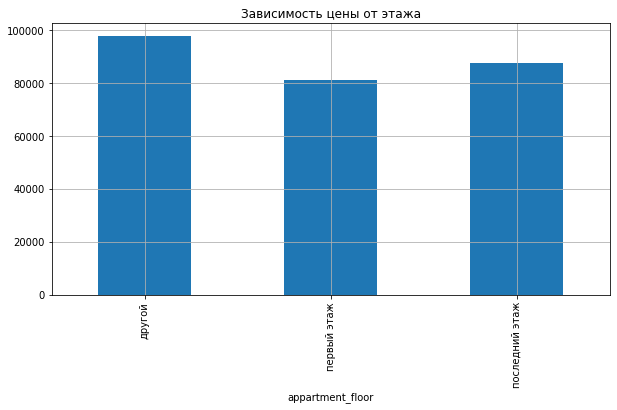

In [51]:
floor_addiction = good_data.groupby(by='appartment_floor')['square_meter_price'].median()
floor_addiction.plot(title='Зависимость цены от этажа', grid=True, x='appartment_floor', y='square_meter_price', figsize=(10, 5), kind='bar')
plt.show()

### Вывод

Мы видим, что больше всего на стоимость квартиры влияют такие факторы, как кол-во комнат и общая площадь квартиры. Взаимосвязь линейная. При этом удивительно, что нет практически никакой связи с отдаленностью от центра города, что для меня странно. Предположу, что это из-за того, что в датафрейме есть данные по разных населенным пунктам, по котороым очень проблематично определить их отдаленность от центра. Да и от центра какого города считать - тоже непонятно. 

С другой стороны, на втором графике мы видим, что стоимость квадратного метра жилья зависит от этажа, на котором оно расположено. Ожидаемо, самый дешевый квадратный метр на первом этаже. Стоимость жилья на последнем также ниже, чем на все остальных этажах в доме, кроме первого. Подозреваю, что это из-за устоявшегося стереотипа, что на последнем этаже течет крыша:) Поэтому эти квартиры стоят дешевле. 

По всем остальным столбцам явной взаимосвязи не выявлено. 

## 10 населенных пунктов 

Выберем 10 населенных пунктов с самым большим кол-вом объявлений. Сохраним в переменную `top_10`

In [52]:
top_10 = good_data.pivot_table(index='locality_name', values='square_meter_price', aggfunc='count').sort_values(by='square_meter_price', ascending=False)
top_10['square_meter_avg_price'] = good_data.pivot_table(index='locality_name', values='square_meter_price', aggfunc='mean').astype('int')
top_10['square_meter_mdn_price'] = good_data.pivot_table(index='locality_name', values='square_meter_price', aggfunc='median').astype('int')
top_10.head(10)

,square_meter_price,square_meter_avg_price,square_meter_mdn_price
locality_name,,,
Санкт-Петербург,14824,110533,104238
посёлок Мурино,507,85876,86111
посёлок Шушары,433,78600,76829
Всеволожск,389,68694,65789
Пушкин,352,102885,99865
Колпино,333,75275,74657
посёлок Парголово,321,90235,91516
Гатчина,297,68932,67924
деревня Кудрово,290,92520,91734


### Вывод по 10 населенным пунктам

Ожидаемо, больше всего объявлений в городе Санкт-Петербург, и самая высокая цена за квардатный метр недвижимости также в городе Санкт-Петербург. При этом меньше всего объявлений в городе Выборг в срезе по 10 городам. Там же и самый дешевый квадратный метр. 

## Квартиры в СПБ

Выделим квартиры в городе Санкт-Петербург. 

In [53]:
df_spb = good_data.query('locality_name == "Санкт-Петербург"')
print(df_spb['city_centers_nearest'].unique())
print(df_spb['city_centers_nearest'].max())

[16028 13933  8098 ...  9167  7262  6263]
29493


У нас в датафрейме есть столбец с расстоянием до центра города, но он указан в метрах. Я переведу все в километры и округлю. 

In [54]:
df_spb['center_distance_km'] = df_spb['center_distance_km'].astype('int')
pd.options.mode.chained_assignment = None

/tmp/ipykernel_270/396338050.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_spb['center_distance_km'] = df_spb['center_distance_km'].astype('int')


Теперь посчитаем среднюю цену для каждого километра. 

In [55]:
df_spb['avg_price_center_nearest'] = df_spb.pivot_table(index='center_distance_km', values='last_price_mln', aggfunc='mean')
df_spb['avg_price_center_nearest'] = round(df_spb['avg_price_center_nearest']).astype('Int32')
display(df_spb.head())
pd.options.mode.chained_assignment = None

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,square_meter_price,weekday,month,year,appartment_floor,living_area_share,kitchen_share,center_distance_km,last_price_mln,avg_price_center_nearest
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,NaN,...,120370,3,3,2019,другой,47.22%,23.15%,16,13.000,10
2,10,5196000.0,56.0,2015-08-20,2,2.70,5,34.3,4,NaN,...,92785,3,8,2015,другой,61.25%,14.82%,13,5.196,10
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,NaN,...,100000,1,6,2018,другой,32.00%,41.00%,8,10.000,11
7,5,7915000.0,71.6,2019-04-18,2,2.70,24,30.5,22,NaN,...,110544,3,4,2019,другой,42.60%,26.40%,11,7.915,9
9,18,5400000.0,61.0,2017-02-26,3,2.50,9,43.6,7,NaN,...,88524,6,2,2017,другой,71.48%,10.66%,15,5.400,6


Построим график зависимости стоимости квартиры от отдаленности от центра. 

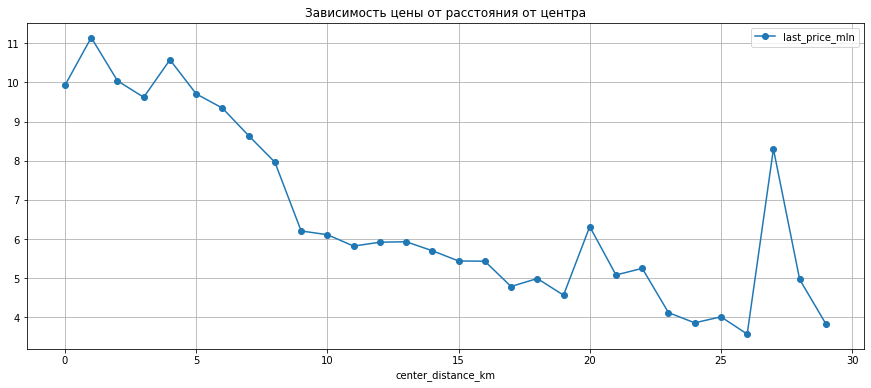

In [56]:
df_spb.pivot_table(index='center_distance_km', values='last_price_mln', aggfunc='mean').plot(style='o-', grid=True, figsize=(15,6), title='Зависимость цены от расстояния от центра')
plt.show()

Чем дальше от центра - тем дешевле жилье. 

Видим, что самая высокая цена в диаметре до 5 км от центра. Далее идет сильный излом по графику. Для большей уверенности в этом выводе я построю такой же график, но по стоимости квадратного метра ниже. 

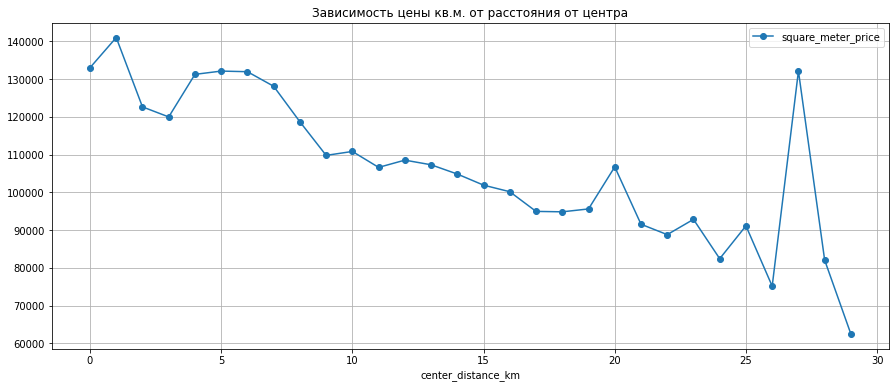

In [57]:
df_spb.pivot_table(index='center_distance_km', values='square_meter_price', aggfunc='mean').plot(style='o-', grid=True, figsize=(15,6), title='Зависимость цены кв.м. от расстояния от центра')
plt.show()

### Вывод по квартирам в СПБ ### 
Видим, что в целом динамика плавнее, чем на графике по стоимости квартиры. Поэтому буду ориентироваться на первый график и сделаю вывод, что центр города заканчивается в радиусе 5 км, так как излом на графике принимает совсем другой характер в этой точке. Отсюда, вся недвижимость, попадаемая в этот диапозон, считается недвижимостью в центре. 

### Квартиры в центре СПБ ###

Создадим новую переменную, в которую сохраним отфильтрованные значения по расстоянию до центра. В нее войдут только те строки, которые отражают недвижимость, рассположенную в центре Санкт-Петербурга. 

In [58]:
df_spb_center = df_spb.query('center_distance_km <= 7')
df_spb_center.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,square_meter_price,weekday,month,year,appartment_floor,living_area_share,kitchen_share,center_distance_km,last_price_mln,avg_price_center_nearest
24,8,6500000.0,97.2,2015-10-31,2,2.7,3,46.5,1,NaN,...,66872,5,10,2015,первый этаж,47.84%,20.16%,2,6.500,4
35,6,15500000.0,149.0,2017-06-26,5,2.7,5,104.0,4,NaN,...,104026,0,6,2017,другой,69.80%,11.41%,3,15.500,<NA>
52,20,11795000.0,136.0,2017-09-22,6,3.0,2,94.0,2,NaN,...,86727,4,9,2017,последний этаж,69.12%,8.09%,6,11.795,<NA>
61,18,7990000.0,74.0,2017-08-24,2,2.7,4,43.0,4,NaN,...,107972,3,8,2017,последний этаж,58.11%,27.03%,4,7.990,<NA>
63,2,20000000.0,118.0,2018-09-11,3,3.0,9,68.0,7,NaN,...,169491,1,9,2018,другой,57.63%,13.56%,4,20.000,<NA>


Чтобы не выводить корреляцию по всей таблице, я создам последнюю переменную, в которую войдут все вышеуказанные столбца из переменной `df_spb_center`.

Для анализа мне понадобятся следующие столбцы: площадь, цена, число комнат, высота потолков, этаж, удалённость от центра, дата размещения объявления. 

In [59]:
spb_data_to_analyze = df_spb_center.loc[: , ['last_price_mln', 'total_area', 'rooms', 'ceiling_height', 'appartment_floor','center_distance_km', 'square_meter_price', 'first_day_exposition', 'month', 'year', 'weekday']]

### Сравнение по площади ###

count    14824.000000
mean        59.687267
std         25.759634
min         12.000000
25%         41.200000
50%         54.000000
75%         71.600000
max        170.000000
Name: total_area, dtype: float64

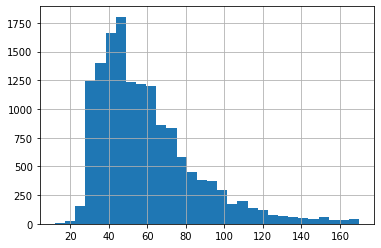

In [60]:
df_spb['total_area'].hist(bins=30)
df_spb['total_area'].describe()

count    3207.000000
mean       77.189991
std        31.672411
min        12.000000
25%        53.000000
50%        72.000000
75%        96.000000
max       170.000000
Name: total_area, dtype: float64

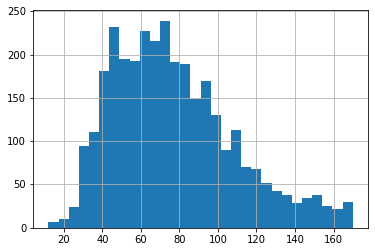

In [61]:
spb_data_to_analyze['total_area'].hist(bins=30)
spb_data_to_analyze['total_area'].describe()

Из гистограммы видно, что распределение по площаль чуть более равномерно. Больше всего квартир площадью от 56 кв.м. до 100. 

### Сравнение по цене ### 

<AxesSubplot:>

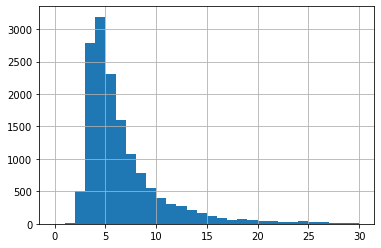

In [62]:
df_spb['last_price_mln'].hist(bins=30)

<AxesSubplot:>

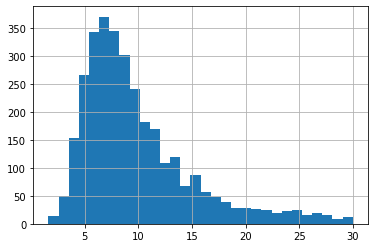

In [63]:
spb_data_to_analyze['last_price_mln'].hist(bins=30)

Ожидаемо для меня, стоимость жилья в центре дороже, причем распределение также смещено вправо для квартир в центре. Я имею ввиду, что больший процент квартир в выборке смещен по стоимости вправо.

### Сравнение по числу комнат ###

<AxesSubplot:>

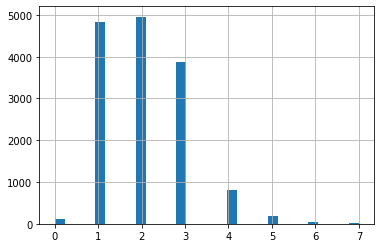

In [64]:
df_spb['rooms'].hist(bins=30)

<AxesSubplot:>

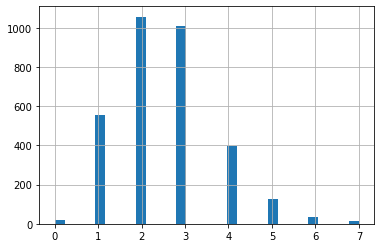

In [65]:
spb_data_to_analyze['rooms'].hist(bins=30)

В центре Санкт-Петербурга преобладают 2-х и 3-х комнатные квартиры. Одновременно с этим, доля однокомнатных квартир ниже по сравнению с общим кол-вом объектов недвижимости во всем городе. 

Глядя на гистограммы, можно сказать, что в центре больше многокомнатных квартир, нежели в среднем во всем городе на 1 кв. км. 

### Сравнение по высоте потолков ###

<AxesSubplot:>

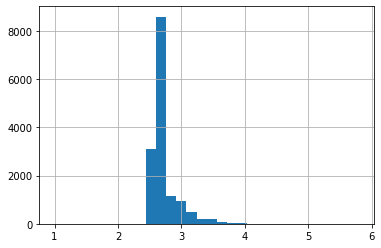

In [66]:
df_spb['ceiling_height'].hist(bins=30)

count    3207.000000
mean        2.920780
std         0.327513
min         2.000000
25%         2.700000
50%         2.750000
75%         3.100000
max         5.800000
Name: ceiling_height, dtype: float64

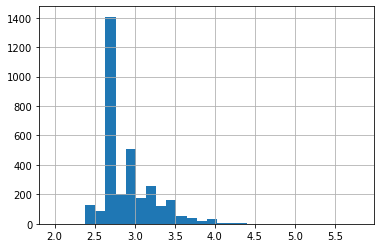

In [67]:
spb_data_to_analyze['ceiling_height'].hist(bins=30)
spb_data_to_analyze['ceiling_height'].describe()

В центре Санкт-Петербурга больше квартир с потолками выше 3 метров. При этом виден очень явный пик в значениях 2.7 и 2.8 метра. 

### Зависимость стоимости жилья ###

In [68]:
spb_data_to_analyze.corr()

,last_price_mln,total_area,rooms,ceiling_height,center_distance_km,square_meter_price,month,year,weekday
last_price_mln,1.000000,0.713329,0.412772,0.178073,-0.086528,0.571681,-0.035168,0.007263,-0.025961
total_area,0.713329,1.000000,0.786156,0.241955,-0.157398,-0.093311,-0.025775,-0.074655,-0.019114
rooms,0.412772,0.786156,1.000000,0.198486,-0.171410,-0.267714,-0.033251,-0.044729,-0.018215
ceiling_height,0.178073,0.241955,0.198486,1.000000,-0.256520,0.016228,-0.024352,0.052921,-0.038658
center_distance_km,-0.086528,-0.157398,-0.171410,-0.256520,1.000000,0.005986,0.014119,-0.012921,0.011399
square_meter_price,0.571681,-0.093311,-0.267714,0.016228,0.005986,1.000000,-0.036041,0.103378,-0.010929
month,-0.035168,-0.025775,-0.033251,-0.024352,0.014119,-0.036041,1.000000,-0.269244,0.027639
year,0.007263,-0.074655,-0.044729,0.052921,-0.012921,0.103378,-0.269244,1.000000,-0.008232
weekday,-0.025961,-0.019114,-0.018215,-0.038658,0.011399,-0.010929,0.027639,-0.008232,1.000000


Факторы, определяющие и влияющие на стоимость недвижимости по квартирам в центре Санкт-Петербурга, такие же, как и в целом по всему датафрейму: общая площадь и кол-во комнат. Корреляция линейная, но немного ниже, чем по всем объектам Санкт-Петербурга. 

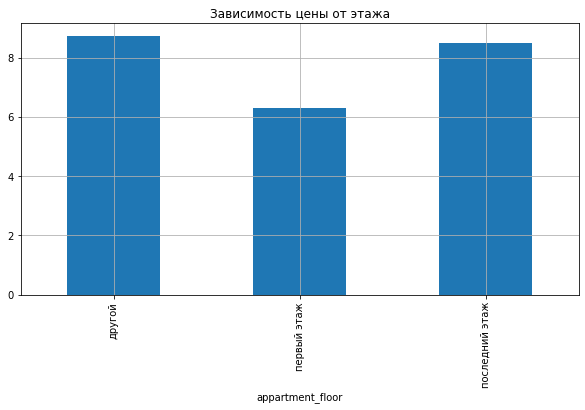

In [69]:
spb_data_grouped = spb_data_to_analyze.groupby(by='appartment_floor')['last_price_mln'].median()
spb_data_grouped.plot(title='Зависимость цены от этажа', grid=True, x='appartment_floor', y='last_price_mln', figsize=(10, 5), kind='bar')
plt.show()

Видим, что в центре также квартиры на первом этаже стоят меньше, но разница между стоимостью квартиры на последнем этаже и на всех других сильно меньше, чем в в целом по всем Санкт-Петербургу. 

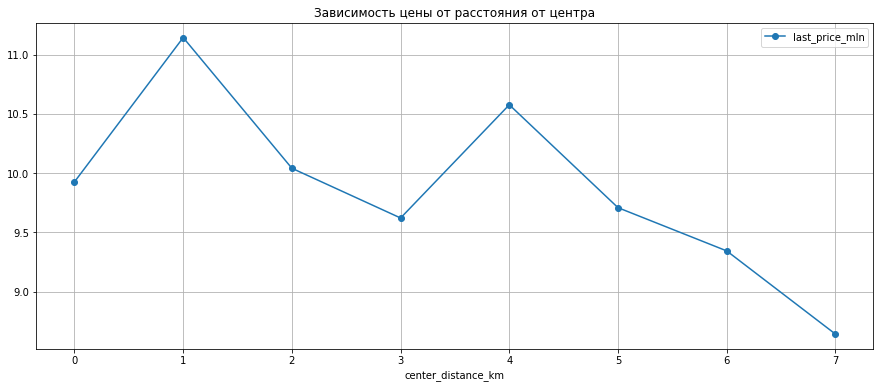

In [70]:
spb_data_to_analyze.pivot_table(index='center_distance_km', values='last_price_mln', aggfunc='mean').plot(style='o-', grid=True, figsize=(15,6), title='Зависимость цены от расстояния от центра')
plt.show()

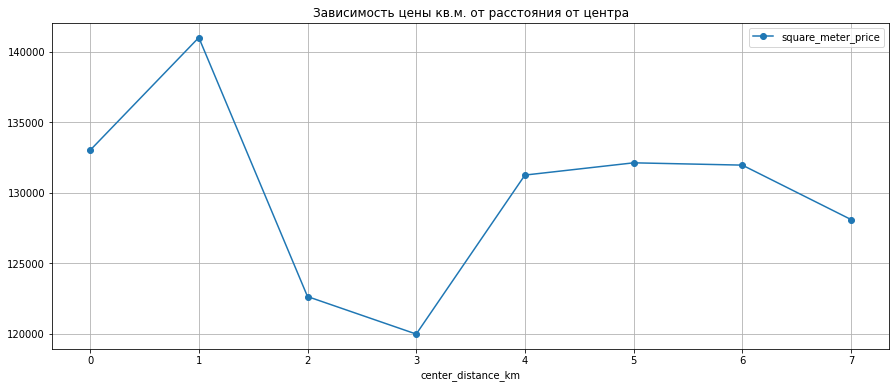

In [71]:
spb_data_to_analyze.pivot_table(index='center_distance_km', values='square_meter_price', aggfunc='mean').plot(style='o-', grid=True, figsize=(15,6), title='Зависимость цены кв.м. от расстояния от центра')
plt.show()

Стоимость жилья и квадратного метра ведет себя немного отлично от динамики по всем объектам недвижимости в г. Санкт-Петербург. Видим, что изломы графиков очень сильные по медианным и средним значения стоимости. При этом, линейного тренда нет. Я связываю это с тем, что в некоторых районах могут быть промзоны небольшие или некоторые районы носят исторический характер (там может быть большое кол-во исторических построек, из-за чего в более новых домах квартиры могут стоить дороже).

### Вывод ###

Глобально, по многим показателям квартиры в центре Санкт-Петербурга "ведут" себя одинаково со всей выборкой квартир по Санкт-Петербургу. В центре ожидаемо дороже недвижимость, она с более высокими потолками (встречается чаще) и больше по квадратуре. 

На стоимость жилья влияют все те же показатели, что и на стоимость жилья во всем Санкт-Петербурге. 

## Общий вывод

- Общий вывод стоит начать с того, что в датафрейме очень большое кол-во пропусков. Предположу, что связаны они с тем, что "держатели" объявлений сами не заполняют многие данные. 
- Из исследования видно, что на стоимость жилья в крупных городах влияют 2 фактора: площадь и кол-во комнат. Дополнительным фактором является отдаленность от центра города. Чем дальше от центра, тем дешевле квадратный метр. 
- При этом, в датафрейме есть большое кол-во данных по другим населенным пунктам, некоторые из которых очень близки по стоимости квадратного метра к г. Санкт-Петербург. 
- В центре квартиры с большим кол-вом комнат и большей общей площадью. 
- В ходе анализа выявлено, что квартиры, расположенные в центральной части г. Санкт-Петербург чаще имеют более высокие потолки. Одной из возможных причин может служить то, что они расположены в исторических зданиях, которые имеют более высокие потолки. 
- Явной зависимости стоимости жилья от дня, месяца или года продажи не выявлено. 
- Выявлена зависимость стоимость квадратного метра жилья от этажа квартиры, на котором она расположена. Так, кв.м. на первом этаже стоит сильно дешевле, чем на всех остальных этажах. 
- При этом разница в стоимости квартир на последнем этаже от стоимости на остальных этажах, за исключением первого, в центре Санкт-Петербурга сильно меньше, чем в остальной части города. 
